In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

plt.style.use('seaborn')

In [20]:
data = pd.DataFrame()
data['dose'] = [0, 1, 2, 3]
data['n'] = [20, 50, 47, 38]
data['survived'] = [5, 18, 30, 27]
data['died'] = data['n'] - data['survived']

In [22]:
data

,dose,n,survived,died
0,0,20,5,15
1,1,50,18,32
2,2,47,30,17
3,3,38,27,11


In [26]:
a_prior = 2
b_prior = 3
prior = stats.beta(a_prior, b_prior)

posts = []
for i, datum in data.iterrows():
    a_post = a_prior + datum['survived']
    b_post = b_prior + datum['died']
    posts.append(stats.beta(a_post, b_post))

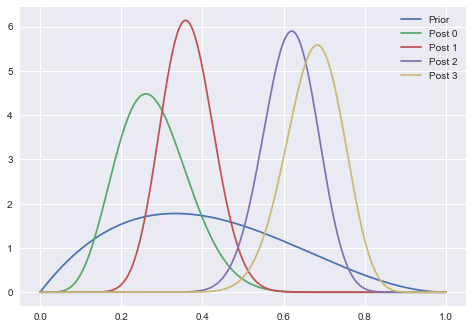

In [29]:
t = np.linspace(0, 1, 1000)
plt.plot(t, prior.pdf(t), label='Prior')
for i, post in enumerate(posts):
    plt.plot(t, post.pdf(t), label=f'Post {i}')
plt.legend()

### Analyzing difference

What is the difference between dosage two and dosage 3? We can do interval sampling to find out

In [67]:
d2samples = posts[2].rvs(10000)
d3samples = posts[3].rvs(10000)

diff = np.mean(d3samples > d2samples)
print(diff)

postpred2 = stats.binom(50, d2samples)
postpred3 = stats.binom(50, d3samples)
p2 = 1 - postpred2.cdf(40).mean()
p3 = 1 - postpred3.cdf(40).mean()
print(p2, p3)

0.7342
0.0156769656742 0.0730834500587


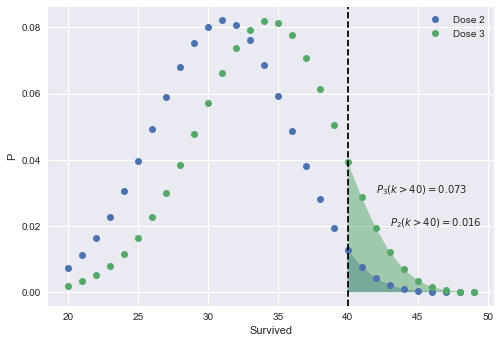

In [89]:
k = np.arange(20, 50)
pmf2 = np.array([postpred2.pmf(k_).mean() for k_ in k])
pmf3 = np.array([postpred3.pmf(k_).mean() for k_ in k])
plt.plot(k, pmf2, 'o', label='Dose 2')
plt.plot(k, pmf3, 'o', label='Dose 3')
plt.axvline(40, color='k', ls='--')
plt.fill_between(k[k>=40], 0, pmf2[k>=40], alpha=.5)
plt.fill_between(k[k>=40], 0, pmf3[k>=40], alpha=.5)
plt.text(43, 0.02, rf'$P_2(k>40)={p2:.3f}$')
plt.text(42, 0.03, rf'$P_3(k>40)={p3:.3f}$')
plt.xlabel('Survived')
plt.ylabel(r'P')
plt.legend()